In [61]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [62]:
df=pd.read_csv('Project_dataset.csv',header=None)

In [63]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,0,-12,-17,-22,-19,-16,-16,-16,-17,-16,...,-22,-22,-17,-25,-32,-28,-30,-30,-25,-19
1,0,-9,-14,-12,-17,-20,-17,-22,-17,-16,...,-30,-22,-25,-25,-27,-32,-33,-28,-22,-16
2,1,-9,-12,-17,-16,-16,-14,-16,-16,-17,...,-25,-30,-28,-24,-17,-22,-30,-32,-33,-28
3,-1,-12,-17,-16,-14,-17,-16,-17,-19,-16,...,-20,-24,-20,-20,-24,-28,-30,-32,-33,-25
4,0,-8,-11,-11,-12,-16,-17,-17,-12,-12,...,-20,-24,-25,-22,-27,-27,-25,-22,-20,-14


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Columns: 209 entries, 0 to 208
dtypes: int64(209)
memory usage: 901.4 KB


In [65]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,...,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,0.425725,-9.954710,-13.534420,-14.402174,-14.623188,-14.648551,-14.737319,-14.766304,-14.840580,-14.710145,...,-24.443841,-24.907609,-23.016304,-22.112319,-23.014493,-25.025362,-28.271739,-29.708333,-28.163043,-25.077899
std,1.290025,2.061605,2.480174,2.637410,2.648022,2.560278,2.613281,2.631946,2.570943,2.505031,...,4.486370,4.507765,4.631787,4.175600,4.119337,4.015769,4.065087,4.464834,5.501250,5.838052
min,-6.000000,-17.000000,-20.000000,-25.000000,-22.000000,-25.000000,-28.000000,-22.000000,-20.000000,-24.000000,...,-38.000000,-36.000000,-35.000000,-36.000000,-36.000000,-36.000000,-40.000000,-43.000000,-41.000000,-44.000000
25%,0.000000,-11.000000,-16.000000,-16.000000,-17.000000,-16.000000,-16.000000,-16.250000,-17.000000,-16.000000,...,-27.000000,-28.000000,-25.000000,-25.000000,-25.000000,-28.000000,-32.000000,-33.000000,-32.000000,-28.000000
50%,0.000000,-9.000000,-14.000000,-14.000000,-14.000000,-14.000000,-14.000000,-16.000000,-16.000000,-14.000000,...,-25.000000,-25.000000,-24.000000,-22.000000,-24.000000,-25.000000,-28.000000,-30.000000,-28.000000,-25.000000
75%,1.000000,-9.000000,-12.000000,-12.000000,-12.000000,-12.000000,-13.500000,-12.000000,-12.000000,-12.000000,...,-22.000000,-22.000000,-20.000000,-19.000000,-20.000000,-22.000000,-25.000000,-27.000000,-25.000000,-22.000000
max,4.000000,-3.000000,-4.000000,-6.000000,-8.000000,-8.000000,-6.000000,-8.000000,-8.000000,-8.000000,...,-11.000000,-11.000000,-4.000000,-6.000000,-12.000000,-14.000000,-17.000000,-11.000000,-8.000000,-4.000000


In [66]:
#sperate training and test dataset
X=df.values
#X_train, X_test=train_test_split(X,test_size=0.3,random_state=0)

In [67]:
from sklearn.preprocessing import StandardScaler,scale
import numpy as np

In [68]:
#Standarize to (0,1)
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [69]:
#calculating covariance matrix
cov_mat=np.cov(X.T)
cov_mat.shape

(209, 209)

In [70]:
#calculating eigen_vals and eigen_vecs
eigen_vals, eigen_vecs=np.linalg.eig(cov_mat)


In [71]:
#variance explained ratios
tot=sum(eigen_vals) # sumation of eigen_value
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)] # ratio of each eigen_value
cum_var_exp=np.cumsum(var_exp)

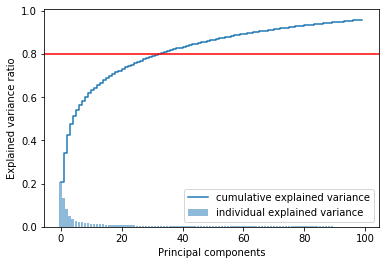

In [87]:
#Pareto plot
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
# plt.bar(range(len(eigen_vals)),var_exp,alpha=0.5, label='individual explained variance')
# plt.step(range(len(eigen_vals)), cum_var_exp, where='post',label='cumulative explained variance') 

plt.bar(range(100),var_exp[:100],alpha=0.5, label='individual explained variance')
plt.step(range(100), cum_var_exp[:100], where='post',label='cumulative explained variance') 
plt.axhline(y=0.8,color='r')
plt.ylabel('Explained variance ratio') 
plt.xlabel('Principal components') 
plt.legend(loc='best') 
plt.show()
fig.savefig('images/pareto.png')

In [73]:
# fig,ax = plt.subplots()
# # plt.bar(range(len(eigen_vals)),var_exp,alpha=0.5, label='individual explained variance')
# # plt.step(range(len(eigen_vals)), cum_var_exp, where='post',label='cumulative explained variance') 
# ax.bar(range(100),var_exp[:100],alpha=0.5, label='individual explained variance')
# ax2 =ax.twinx()
# ax2.step(range(100), cum_var_exp[:100], where='post',label='cumulative explained variance') 
# ax.axhline(y=0.8,color='r')
# ax.set_ylabel(f'Explained variance ratio')
# ax2.set_ylabel(f'cumulative explained variance')
# ax.set_xlabel('Principal components') 
# fig.legend(loc='upper right') 
# plt.show()

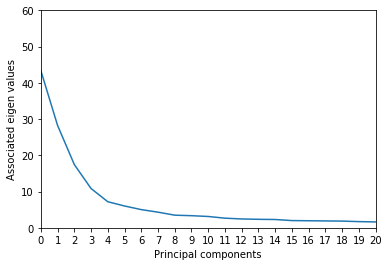

In [86]:
#Scree plot
fig,ax = plt.subplots()
plt.plot(range(len(eigen_vals)),sorted(eigen_vals,reverse=True))
plt.xlim(0,20)
plt.ylim(0,60)
plt.xticks(np.linspace(0,20,21))
plt.ylabel('Associated eigen values') 
plt.xlabel('Principal components')
plt.show()
fig.savefig('images/steer.png')

In [75]:
# Determine number of PC
"""as the Scree plot says,  PCs can explain most of the varaince"""
from sklearn.decomposition import PCA
pca_num=8
pca=PCA(n_components=pca_num) # chose 20 PCs for following analysis
X_pca=pca.fit_transform(X)
X_pca.shape

(552, 8)

In [76]:
# covariance matrix of trimmed dataset
cov_mat=np.cov(X_pca.T)
cov_mat_inv=np.linalg.inv(cov_mat)
cov_mat.shape

(8, 8)

In [77]:
# X bar matrix
X_bar=[X_pca[:,i].mean() for i in range(0,pca_num)]

In [78]:
# calculating X_j-X_bar
X_sub=[X_pca[i,:]-X_bar for i in range(len(X_pca))]
X_sub=np.asmatrix(X_sub)

In [79]:
# calculating T^2 statistics
T_square=[np.float(np.matmul(np.matmul(X_sub[i,:],cov_mat_inv),X_sub[i,:].T)) for i in range(len(X_sub))]

In [80]:
#use alaph = 0.05 then the probability of the chi sqaure dist. will be
from scipy.stats import chi2
alpha=0.05
UCL=chi2.isf(alpha,pca_num)
print(UCL)

15.507313055865454


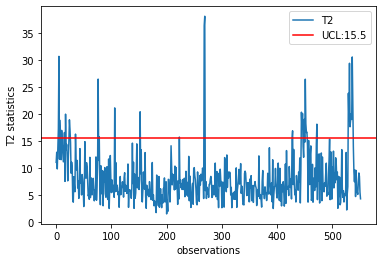

In [85]:
# ploting
fig,ax = plt.subplots()
plt.plot(range(len(X_pca)),T_square, label='T2')
plt.axhline(y=UCL,color='r',label='UCL:'+str(UCL)[:4])
plt.xlabel('observations') 
plt.ylabel('T2 statistics')
plt.legend(loc='best') 
plt.show()
fig.savefig('images/t2.png')

In [89]:
# remove outlier
T_square_tr=[i for i in T_square if i<=UCL]
len(T_square_tr)
len(T_square)

552

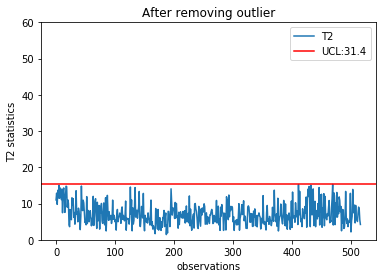

In [90]:
# ploting
fig, ax = plt.subplots()
plt.title('After removing outlier')
plt.plot(range(len(T_square_tr)),T_square_tr, label='T2')
plt.axhline(y=UCL,color='r',label='UCL:31.4')
plt.ylim(0,60)
plt.xlabel('observations') 
plt.ylabel('T2 statistics')
plt.legend(loc='best') 
plt.show()
fig.savefig("images/t2-after.png")

In [91]:
# remove outlier of X_pca
X_pca_tr=[X_pca[i,:] for i in range(len(X_pca)) if T_square[i]<=UCL ] 
X_pca_tr=np.asarray(X_pca_tr)
X_pca_tr.shape
len(X_pca_tr)

517

In [92]:
# from previous phase1 analysis we can use sample mean and variance to represent population mean and varianc
# X bar matrix
X_bar_tr=[X_pca_tr[:][i].mean() for i in range(0,pca_num)]

In [93]:
# covariance matrix
cov_=np.cov(X_pca_tr.T)
cov_inv=np.linalg.inv(cov_)

In [94]:
# calculating m-CUSUM indexes
CUSUM_mc=np.zeros(len(X_pca_tr),dtype=float)
CUSUM_n=np.ones(len(X_pca_tr))
CUSUM_k=3.0 # detecting statistical distance of mean shift 

In [97]:
# initial cond.
import math
CUSUM_c=X_pca_tr[0]-X_bar_tr
CUSUM_mc[0]=max(0.0,math.sqrt(np.matmul(np.matmul(CUSUM_c,cov_inv),CUSUM_c.T))-CUSUM_k*CUSUM_n[0])


In [98]:
for i in range(1,len(X_pca_tr)):
    if (CUSUM_mc[i-1]!=0.0):
        CUSUM_n[i]=CUSUM_n[i-1]+1
    CUSUM_c=sum(X_pca_tr[(i-int(CUSUM_n[i])+1):i+1]-X_bar_tr) 
    CUSUM_mc[i]=max(0.0,math.sqrt(np.matmul(np.matmul(CUSUM_c,cov_inv),CUSUM_c.T))-CUSUM_k*CUSUM_n[i])

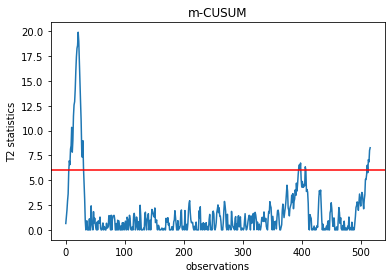

In [107]:
#plotting
UCL =6
fig,ax = plt.subplots()
plt.title("m-CUSUM")
plt.plot(range(len(CUSUM_mc)),CUSUM_mc)
plt.axhline(y=UCL,color='r',label='UCL:{}'.format(UCL))
plt.xlabel('observations') 
plt.ylabel('T2 statistics')
plt.show()
fig.savefig("images/mcusum.png")

In [100]:
# mewma
mewma_lamda=0.3
mewma_z=np.zeros((len(X_pca_tr),len(X_pca_tr[0,:])))
mewma_z[0,:]=X_bar_tr

In [101]:
# Giving value to z
for i in range(1,len(X_pca_tr)):
    mewma_z[i,:]=mewma_lamda*X_pca_tr[i,:]+(1-mewma_lamda)*mewma_z[(i-1),:]

In [102]:
# cov of z
cov_z=np.cov(mewma_z.T)
cov_z_inv=np.linalg.inv(cov_z)
# z sub
mewma_z_sub=mewma_z-X_bar_tr

In [103]:
# T2 of mEWMA
mewma_t=[np.float(np.matmul(np.matmul(mewma_z_sub[i,:],np.linalg.inv(np.cov(mewma_z.T))),mewma_z_sub[i,:].T)) for i in range(len(mewma_z_sub))]
    

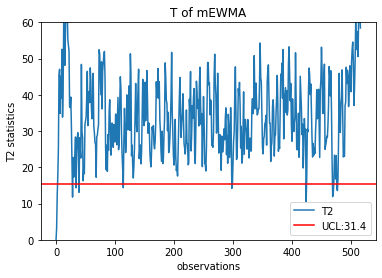

In [104]:
#plotting
plt.title('T of mEWMA')
plt.plot(range(len(mewma_t)),mewma_t, label='T2')
plt.axhline(y=UCL,color='r',label='UCL:31.4')
plt.ylim(0,60)
plt.xlabel('observations') 
plt.ylabel('T2 statistics')
plt.legend(loc='best') 
plt.show()

In [201]:
cov_z=np.cov(mewma_z[i,:].T)
cov_z

array(5.19630994)